# Regresion basically aap numerica value ko predict karte hain that we did in Linear Regression


# logistic.regression use for classification

# Logistic Regression : only for classification cheezon ko classify karne ke liye.
 # classify ke data ko predict karni ho either
 # 1. binary(0,1,true/false -only for 2 values) me karte 
 # 2. multiclass (,ore then 2 categories a,b,c,d....n)
 # 3. one vs rest classification
 # multilabel (multiple labels on one instance)  like movie,hollywoodd,thriller,boxoffice are labels
# explain
# 1. Logistic Regression is a type of regression analysis used to predict the outcome of a categorical

# assunptions
 # 1.The dependent variable must be categorical in nature
 # 2. The independent variables must be continuous or categorical in nature
 # 3. There should be no outliers
 # 4. Thers should be no high correlations among the independent variables. check with correaltion matrix



# Logistic Regression Basics

Logistic Regression is a statistical and machine learning method used to predict categorical outcomes (such as binary or multi-class). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and maps them to discrete classes.
When to Use Logistic Regression

    Binary Classification: When the target variable has two categories (e.g., Yes/No, Spam/Not Spam).
    Multi-class Classification: Extensions like multinomial logistic regression handle more than two classes.
    It is widely used for classification problems in fields like finance, healthcare, marketing, etc.

    Logistic Regression Basics

Logistic Regression is a statistical and machine learning method used to predict categorical outcomes (such as binary or multi-class). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and maps them to discrete classes.
When to Use Logistic Regression

    Binary Classification: When the target variable has two categories (e.g., Yes/No, Spam/Not Spam).
    Multi-class Classification: Extensions like multinomial logistic regression handle more than two classes.
    It is widely used for classification problems in fields like finance, healthcare, marketing, etc.

How Logistic Regression Works

Logistic regression applies the logit (logistic) function to ensure output probabilities lie between 00 and 11. The model predicts the probability of the target variable being 11 (positive class):
P(y=1∣X)=11+e−(β0+β1X)
P(y=1∣X)=1+e−(β0​+β1​X)1​

Where:

    P(y=1∣X)P(y=1∣X): Probability of the positive class.
    XX: Independent variable(s).
    β0β0​: Intercept.
    β1β1​: Coefficient(s).
    ee: Base of the natural logarithm.

The decision boundary is typically set at P=0.5P=0.5, meaning:

    P(y=1∣X)>0.5⇒y=1P(y=1∣X)>0.5⇒y=1
    P(y=1∣X)≤0.5⇒y=0P(y=1∣X)≤0.5⇒y=0

    Logistic Regression Basics

Logistic Regression is a statistical and machine learning method used to predict categorical outcomes (such as binary or multi-class). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and maps them to discrete classes.
When to Use Logistic Regression

    Binary Classification: When the target variable has two categories (e.g., Yes/No, Spam/Not Spam).
    Multi-class Classification: Extensions like multinomial logistic regression handle more than two classes.
    It is widely used for classification problems in fields like finance, healthcare, marketing, etc.

How Logistic Regression Works

Logistic regression applies the logit (logistic) function to ensure output probabilities lie between 00 and 11. The model predicts the probability of the target variable being 11 (positive class):
P(y=1∣X)=11+e−(β0+β1X)
P(y=1∣X)=1+e−(β0​+β1​X)1​

Where:

    P(y=1∣X)P(y=1∣X): Probability of the positive class.
    XX: Independent variable(s).
    β0β0​: Intercept.
    β1β1​: Coefficient(s).
    ee: Base of the natural logarithm.

The decision boundary is typically set at P=0.5P=0.5, meaning:

    P(y=1∣X)>0.5⇒y=1P(y=1∣X)>0.5⇒y=1
    P(y=1∣X)≤0.5⇒y=0P(y=1∣X)≤0.5⇒y=0

Steps in Logistic Regression

    Preprocessing: Prepare your data (handle missing values, scaling, encoding, etc.).
    Model Training: Fit the logistic regression model on training data.
    Prediction: Use the model to predict probabilities or classes.
    Evaluation: Assess performance using metrics like accuracy, precision, recall, F1-score, ROC-AUC, etc.

    Key Takeaways

    Logistic regression is ideal for classification tasks (e.g., pass/fail, spam/not spam).
    It outputs probabilities, which can be thresholded for classification.
    The sigmoid function ensures output probabilities are between 0 and 1.

Logistic regression is simple, interpretable, and effective for many real-world problems!

In [31]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve,precision_score, f1_score,recall_score
# preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


In [11]:
# import any dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Safely drop 'deck' if it exists
df.drop('deck', axis=1, errors='ignore', inplace=True)

# Impute missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = le.fit_transform(df[col])

# Display the processed DataFrame
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [25]:
# bring x and y columsn survuval of one thing
x =df.drop('survived',axis=1)
y=df['survived']

In [27]:
# train test split data on 80:20

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
# call the model
model =LogisticRegression()

In [29]:
# train the model

model.fit(X_train,y_train)

LogisticRegression()

In [30]:
# predict the values
y_pred = model.predict(X_test)

In [35]:
# evaluate the models print all matrix
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('confusion_matrix: ', confusion_matrix(y_test, y_pred))
print('precision_score: ', precision_score(y_test, y_pred))
# print f1 and recall_score
print('f1_score: ', f1_score(y_test, y_pred))
# print recall_score
print('recall_score: ', recall_score(y_test, y_pred))
# print classification report
print('classification_report: ', classification_report(y_test, y_pred))


accuracy_score:  1.0
confusion_matrix:  [[109   0]
 [  0  70]]
precision_score:  1.0
f1_score:  1.0
recall_score:  1.0
classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        70

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



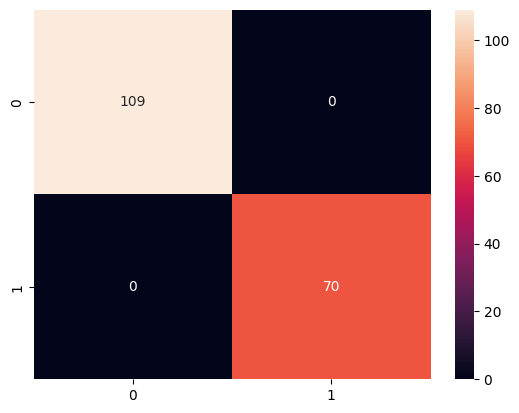

In [36]:
# plot the confusion matrix as heat map

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [39]:
# save the model
import pickle
pickle.dump(model, open('./saved_models/02_logistic_regression_model.pkl','wb'))


# lr for classsification

Accuracy: 0.96
Confusion Matrix:
 [[1447    1]
 [  70  154]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1448
           1       0.99      0.69      0.81       224

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



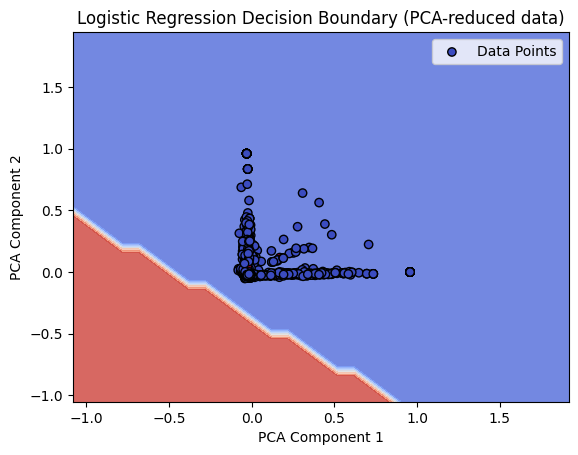

Prediction for new message: Not Spam


: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Step 1: Load the SMS Spam Collection Dataset
# For this example, we assume you have the dataset in CSV format with 'label' and 'message' columns
df = pd.read_csv('ML_Projects\Logistics_Regression\SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Step 2: Convert labels into binary format (ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into features (X) and labels (y)
X = df['message']
y = df['label']

# Step 3: Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 5: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the decision boundary (using PCA for dimensionality reduction)
# Reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Train the logistic regression model on the PCA-reduced data
model_pca = LogisticRegression()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model_pca.fit(X_train_pca, y_train_pca)

# Plot the decision boundary using PCA components
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='black', cmap='coolwarm', label='Data Points')
plt.title('Logistic Regression Decision Boundary (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Step 8: Predict for a new data point (email/text message)
new_message = ["Congratulations! You've won a $1000 gift card. Call now!"]  # Example spam message
new_message_tfidf = vectorizer.transform(new_message)
new_prediction = model.predict(new_message_tfidf)

print(f"Prediction for new message: {'Spam' if new_prediction[0] == 1 else 'Not Spam'}")
